In [58]:
import json
import random
import tarfile
from collections import Counter
from datetime import datetime
import re
import pickle
from matplotlib import pyplot as plt
from pprint import pprint
from zipfile import ZipFile
import string

In [59]:
def get_next(tar):
    for tarinfo in tar:
        if tarinfo.isreg():
            yield json.load(tar.extractfile(tarinfo))

In [60]:
def given_date(date):
    z = datetime.strptime(date, '%Y-%m-%d')
    return z.year == 2015

In [61]:
st = r"\W+"
res1 = r"(<[^>]*>)"
res2 = r"(-(\n|\r|\r\n|\x0b|\x0c|\x1c|\x1d|\x1e|\x85|\u2028|\u2029))"
res3 = r"^[a-ząćęłńóśźż]+$"
com = re.compile(st, re.IGNORECASE)
com1 = re.compile(res1, re.IGNORECASE)
com2 = re.compile(res2, re.IGNORECASE)
com3 = re.compile(res3, re.IGNORECASE)

Used only once than saved by pickle to countFile file:

In [62]:
tar = tarfile.open("../saos-dump-23.02.2018.tar.gz", "r:gz")

count = Counter()

for x in get_next(tar):
    for y in range(len(x['items'])):
        try:
            if given_date(x['items'][y]['judgmentDate']):
                for w in com.split(com2.sub("", com1.sub("", x['items'][y]['textContent']))):
                    word = w.translate(str.maketrans("", "", "§" + string.punctuation)).lower()
                    if len(word) > 1 and com3.match(word):
                        count[word] += 1
        except KeyError:
            pass
            # pprint(KeyError)
pprint(count.most_common(100))
with open("countFile", "wb") as f:
    pickle.dump(count, f)

[('na', 2824896),
 ('do', 2321623),
 ('nie', 2010295),
 ('że', 1552500),
 ('art', 1365815),
 ('się', 1208438),
 ('przez', 1170894),
 ('dnia', 1089303),
 ('od', 1021377),
 ('sąd', 963906),
 ('jest', 772094),
 ('za', 752334),
 ('oraz', 686839),
 ('zł', 629130),
 ('tym', 575726),
 ('to', 566799),
 ('roku', 551938),
 ('sądu', 490046),
 ('co', 480624),
 ('po', 459107),
 ('iż', 449040),
 ('sprawie', 410134),
 ('pracy', 400938),
 ('jego', 381883),
 ('umowy', 376044),
 ('dniu', 375516),
 ('nr', 374650),
 ('przy', 362853),
 ('ust', 359285),
 ('tego', 352671),
 ('powoda', 338455),
 ('postępowania', 321346),
 ('jej', 320637),
 ('jak', 318623),
 ('podstawie', 312932),
 ('dla', 311587),
 ('ustawy', 304410),
 ('lub', 294942),
 ('jako', 283147),
 ('ze', 281291),
 ('zakresie', 280825),
 ('akt', 274542),
 ('powód', 259619),
 ('wyroku', 258853),
 ('należy', 253415),
 ('pkt', 253091),
 ('pozwanego', 252214),
 ('rzecz', 248483),
 ('sprawy', 243043),
 ('także', 242985),
 ('kosztów', 242618),
 ('również', 2

How to Write a Spelling Corrector

src: https://norvig.com/spell-correct.html

In [63]:
with open("countFile", "rb") as f:
    WORDS = Counter(pickle.load(f))
    

def P(word, N=sum(WORDS.values())):
    "Probability of `word`."
    return WORDS[word] / N


def correction(word):
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)


def candidates(word):
    "Generate possible spelling corrections for word."
    return known([word]) or known(edits1(word)) or known(edits2(word)) or [word]


def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in dic)


def edits1(word):
    "All edits that are one edit away from `word`."
    letters = 'abcdefghijklmnoprstuwyząćęłńóśżź'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)


def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))


In [64]:
X = []
Y = []
for t, tup in enumerate(WORDS.most_common()):
    X.append(t+1)
    Y.append(tup[1])

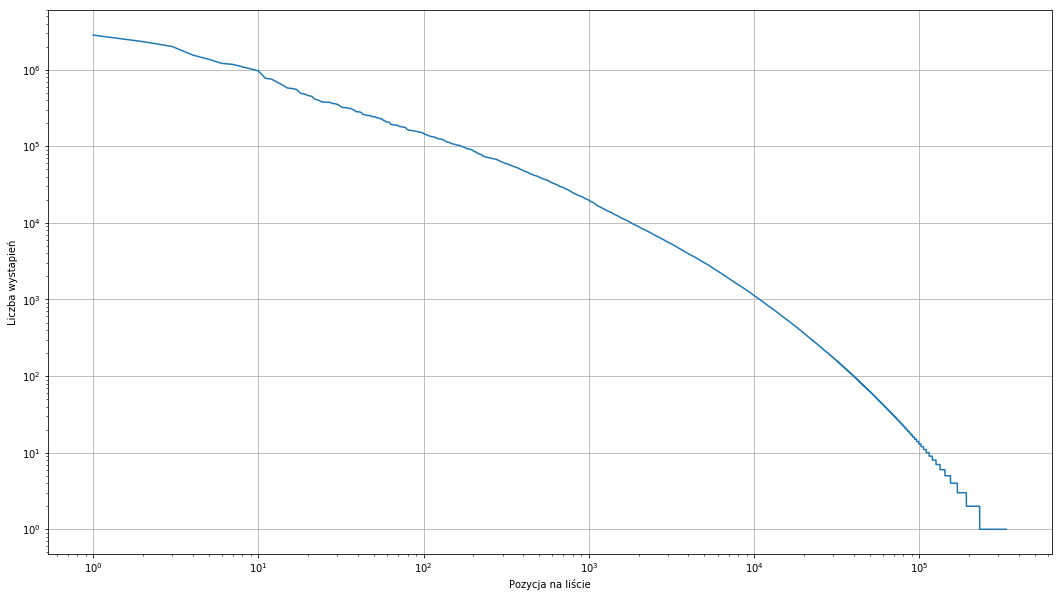

In [65]:
plt.figure(figsize=(18,10))
plt.loglog(X, Y)
plt.xlabel('Pozycja na liście')
plt.ylabel('Liczba wystapień')
plt.grid(True)
plt.show()

In [66]:
dic = set()
# with ZipFile('polimorfologik-2.1.zip') as zips:
#     with zips.open("polimorfologik-2.1.txt", "r") as txt:
#         for line in txt:
#             first, second, _ = line.decode("utf-8").split(';')

#             dic.add(first.lower())
#             dic.add(second.lower())
# with open("dictFile", "wb") as f:
#     pickle.dump(dic, f)
with open("dictFile", "rb") as f:
    dic = set(pickle.load(f))
pprint(WORDS.most_common(10))

[('na', 2824896),
 ('do', 2321623),
 ('nie', 2010295),
 ('że', 1552500),
 ('art', 1365815),
 ('się', 1208438),
 ('przez', 1170894),
 ('dnia', 1089303),
 ('od', 1021377),
 ('sąd', 963906)]


In [67]:
new_set = tuple(set(WORDS) - dic)
pprint(len(new_set))

66726


In [68]:
pprint(new_set[:30])

('hydrochloride',
 'przeznczone',
 'zbąszyniak',
 'califomi',
 'wrazz',
 'ibmlenovo',
 'spfere',
 'pbe',
 'czteroprzewodowa',
 'zminusowane',
 'odkosztów',
 'punkci',
 'gojżewski',
 'latitude',
 'wiązującą',
 'goprówki',
 'sipp',
 'miąskiewicz',
 'owanego',
 'fitotronowych',
 'dystrybującym',
 'socialny',
 'opomiarowanej',
 'gazeci',
 'zuberta',
 'cieśnia',
 'ssw',
 'tuleji',
 'valable',
 'zazakańczanie')


In [69]:
for word in new_set[:30]:
    pprint(word + ": " + correction(word))

'hydrochloride: hydrochorie'
'przeznczone: przeznaczone'
'zbąszyniak: zbąszynia'
'califomi: calikom'
'wrazz: wraz'
'ibmlenovo: ibmlenovo'
'spfere: sferze'
'pbe: pe'
'czteroprzewodowa: czteroprzewodowa'
'zminusowane: zmiksowane'
'odkosztów: kosztów'
'punkci: punkcie'
'gojżewski: godlewski'
'latitude: attitude'
'wiązującą: wizującą'
'goprówki: gotówki'
'sipp: spp'
'miąskiewicz: miskiewicz'
'owanego: zwanego'
'fitotronowych: fototropowych'
'dystrybującym: dystrybuującym'
'socialny: socjalny'
'opomiarowanej: pomianowanej'
'gazeci: gazecie'
'zuberta: huberta'
'cieśnia: cienia'
'ssw: msw'
'tuleji: tuleja'
'valable: kalabie'
'zazakańczanie: zakańczanie'


In [70]:
new_count = Counter()
for inits in new_set:
    if WORDS[inits] > 0:
        new_count[inits] = WORDS[inits]
for word in new_count.most_common()[:30]:
    pprint(word[0] + ": " + correction(word[0]))

'sygn: syn'
'zw: za'
'lex: lek'
'iv: iż'
'pzp: pip'
'sso: so'
'siwz: siwy'
'kpk: kk'
'sa: na'
'csk: ck'
'vi: ii'
'ssa: psa'
'aca: ca'
'ckn: cen'
'viii: iii'
'ssr: spr'
'vii: ii'
'uk: kk'
'osnc: on'
'czp: czy'
'sekr: sek'
'aua: aka'
'osnp: osp'
'ix: iż'
'późn: późno'
'zd: od'
'meriti: merita'
'ns: na'
'gc: go'
'zb: za'


In [71]:
pprint("Procent błednych słów: {}".format(sum(new_count.values())/sum(WORDS.values())*100))

'Procent błednych słów: 1.3508894066937491'


In [72]:
pprint("Procent błednych słów bez brania pod uwagę ilości wystąpeń: {}".format(len(new_count.keys())/len(WORDS.keys())*100))

'Procent błednych słów bez brania pod uwagę ilości wystąpeń: 19.894395067396935'
